# 2.3. 지도학습 알고리즘

In [48]:
# Default library
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn


* mglearn은 그래프나 데이터 적재와 관련된 세세한 코드 등의 이 책을 위해 만든 유틸리티 함수들
* 주로 간단한 그래프를 그리거나, 데이터를 로드할 때 사용
* 내용과는 크게 관련 없음

## 2.3.1. 예제에 사용할 데이터 셋

X.shape:  (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


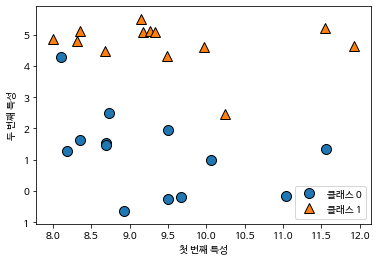

In [39]:
# 데이터셋
X, y = mglearn.datasets.make_forge()

# 산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape: ", X.shape)

* scikit-learn에 있는 load_breast_cancer 함수 사용해서 유방암 종양 임상 데이터 사용

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [41]:
print("유방암 데이터 형태: ", cancer.data.shape)
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

유방암 데이터 형태:  (569, 30)
클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [42]:
print("특성 이름: \n", cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


* 회귀 분석용 실제 데이터셋으로는 보스턴 주택가격 데이터셋 사용

In [43]:
from sklearn.datasets import load_boston
boston = load_boston()

print("데이터 형태: \n", boston.data.shape)

데이터 형태: 
 (506, 13)


## 2.3.2. k-최근접 이웃

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


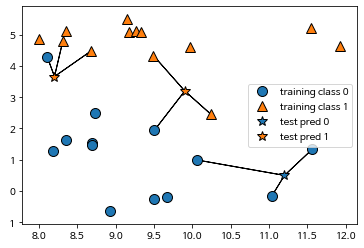

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [45]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# 학습데이터 / 검증데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# KNeighborsClassifier 객체 생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

# 학습
clf.fit(X_train, y_train)

print("테스트 세트 예측: ", clf.predict(X_test))
print("테스트 세트 정확도: {0:.2f}" .format(clf.score(X_test, y_test)))

테스트 세트 예측:  [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


### K-NeighborsClassifier 분석

* 2차원 데이터셋이몰 가능한 모든 테스트 포인트의 예측을 XY 평면에 그릴 수 있음
* 이웃의 수를 늘릴수록 경계가 부드러워짐
* 다시말해, 이웃의 수를 줄일수록 복잡도가 올라감

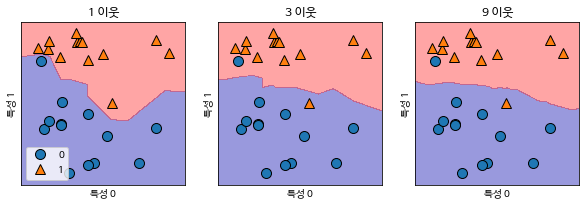

In [53]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    
    # fit 메소드는 self 오브젝트를 리턴함
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃" .format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

axes[0].legend(loc = 3)

* 일반화 능력

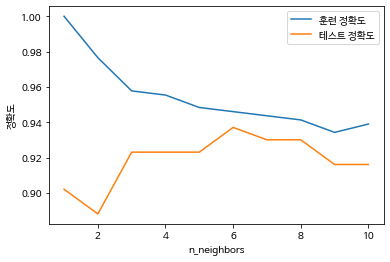

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify = cancer.target,
    random_state = 66
)

train_accuracy = []
test_accuracy  = []

# 1~10까지 n_neighbors를 적용
n_neighbors_settings = range(1, 11)

for n_neighbors in n_neighbors_settings:
    
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # 훈련 세트 정확도 저장
    train_accuracy.append(clf.score(X_train, y_train))
    
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(n_neighbors_settings,
         train_accuracy,
         label = '훈련 정확도')
plt.plot(n_neighbors_settings,
         test_accuracy,
         label = '테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

plt.show()

### K-neighbors 회귀

* wave 데이터셋 사용
* scikit-learn에서 회귀는 KNeighborsRegressor로 구현

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


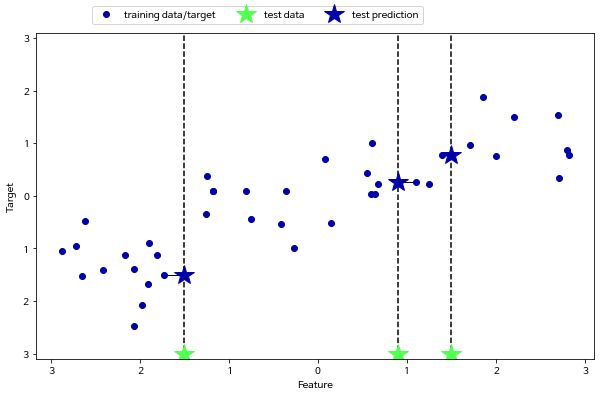

In [72]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


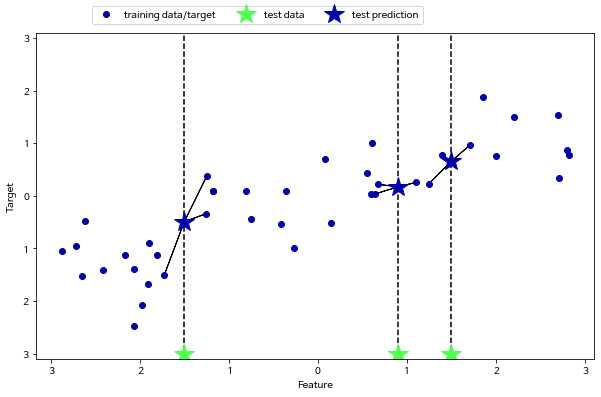

In [73]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [91]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

# wave 데이터셋을 훈련/테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 0
)

# 이웃의 수를 3으로 하여 모델국체 생성
reg = KNeighborsRegressor(n_neighbors = 3)
# 훈련 데이터와 타깃을 사용하여 학습
reg.fit(X_train, y_train)

print("테스트 세트: ", reg.predict(X_test))
print("테스트 세트 R^2: {0:.2f}" .format(reg.score(X_test, y_test)))

테스트 세트:  [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83
